## Exercício de Web Scraping 

#### O exercício consistirá em se conectar com um site, fazer a leitura do código do site e manipulá-lo a fim de transformar a tabela de um banco de dados num objeto DataFrame do Pandas. Em seguida vamos fazer algumas plotagens simples e salvar o banco de dados em um novo arquivo CSV.

-------------------------------------------------------------------------------------------------------

In [1]:
# Estruturas de dados e operações matemáticas.
import numpy as np
import pandas as pd

# Bibliotecas para scraping.
from bs4 import BeautifulSoup as bs
import requests

# Plotagem.
import matplotlib.pyplot as plt
import seaborn as sns

# Estilização.
plt.style.use('seaborn-whitegrid')
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)

-------------------------------------------------------------------------------------------------------

#### O site que faremos o scraping será o DB Engines Ranking que rankeia os softwares de banco de dados por popularidade e tipo, atribuindo uma pontuação a cada um: https://db-engines.com/en/ranking

In [2]:
# Recuperando o conteúdo do código HTML do site.
html = requests.get('https://db-engines.com/en/ranking').content

# Parseando o código para a leitura em Python.
dados = bs(html, 'html5lib')

# Localizando a div da tabela no site usando as tags apropriadas.
tags = dados.find('table', {'class': 'dbi'}).find('tbody').find_all('tr')

# Criando as estruturas que conterão as informações do DataFrame.
linhas = []

rank_oct21 = []
rank_sep21 = []
rank_oct20 = []

dbms = []

datamodel = []

score_oct21 = []
score_sep21 = []
score_oct20 = []

# Localizando a tabela propriamente dita e salvando as informações de cada linha em uma lista (temp). 
# Todas as listas, contendo a informação de cada linha, serão colocadas dentro de outra lista (linhas).
for i in tags[3:]:
    temp = []
    for j in i.find_all(['td', 'th']):
        temp.append(j.text)
    linhas.append(temp)

# Construindo as colunas.
for i in linhas:

    # Tratamento de erro para possíveis valores que não possam ser convertidos para float.
    for v, l in zip([0, 1, 2, 5, 6, 7], [rank_oct21, rank_sep21, rank_oct20, score_oct21, score_sep21, score_oct20]):
        try:
            float(i[v])
            l.append(float(i[v]))
        except:
            # Caso o valor não possa ser convertido, adicionamos NaN (Not a Number) em seu lugar.
            l.append(np.nan)

    # Pegando apenas os nomes dos bancos de dados, excluindo toda informação não desejada que veio junto da leitura das tags.
    if 'Detailed' in i[3]:
        n = i[3].split().index('Detailed')
        s = ''
        for j in range(n):
            s = s + i[3].split()[j] + ' '
        dbms.append(s.strip())
    else:
        dbms.append(i[3])

    if 'Multi-model' in i[4]:
        s = ''
        n = i[4].split().index('Multi-model')
        for j in range(n+1):
            s = s + i[4].split()[j] + ' '
        datamodel.append(s.strip())
    else:
        datamodel.append(i[4])


# Dicionário, com índices hierarquizados, que será usado para criar o DataFrame.
d = {('Rank', 'Oct21'): rank_oct21, ('Rank', 'Sep21'): rank_sep21, ('Rank', 'Oct20'): rank_oct20, 
     ('DBMS', ''): dbms, ('Database Model', ''): datamodel, 
     ('Score', 'Oct21'): score_oct21, ('Score', 'Sep21'): score_sep21, ('Score', 'Oct20'): score_oct20}

# Criando o DataFrame
df = pd.DataFrame(d)
df.head()

Rank              ...    Score              
  Oct21 Sep21 Oct20  ...    Oct21  Sep21  Oct20
0   1.0   1.0   1.0  ...  1251.32  -5.51 -70.42
1   2.0   2.0   2.0  ...  1198.23 -16.45 -56.59
2   3.0   3.0   3.0  ...   933.78 -15.27 -81.52
3   4.0   4.0   4.0  ...   616.93   7.54  67.64
4   5.0   5.0   5.0  ...   485.66  -2.98  23.27

[5 rows x 8 columns]

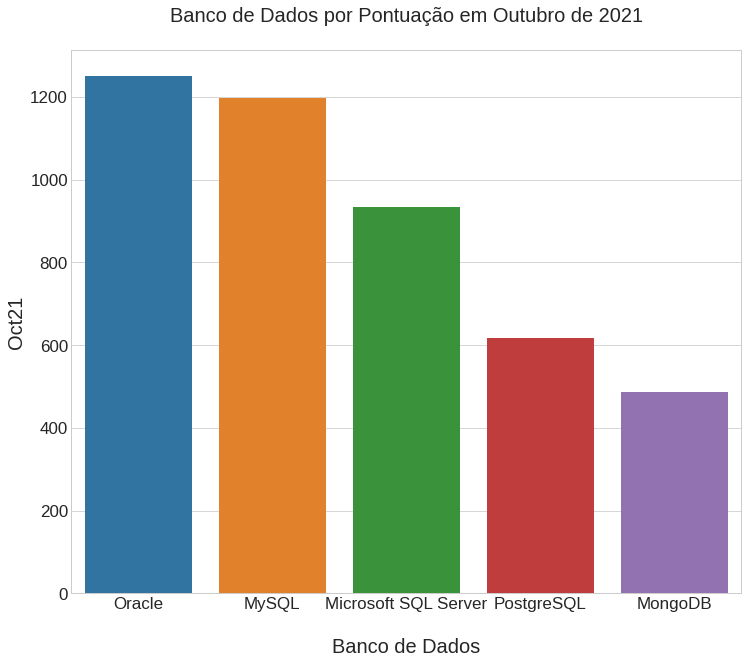

In [3]:
# Para a plotagem precisamos de pelo menos um eixo numérico, então vamos converter uma das colunas para float. 
# Vale ressaltar que as Series criadas no dicionário são do tipo dtype=object.
df.loc[:, ('Score', 'Oct21')] = df.loc[:, ('Score', 'Oct21')].astype(float)

# Criando uma grade e um subplot.
fig, ex = plt.subplots(1, 1, figsize=(12, 10))

# Plotando os 5 primeiros Bancos de Dados por Score em um histograma.
sns.barplot(data=df['Score'].join(df['DBMS'].head()), x='DBMS', y='Oct21').set(title='Banco de Dados por Pontuação em Outubro de 2021\n', xlabel='\nBanco de Dados')
plt.show()

In [4]:
# Salvando o novo banco de dados para um arquivo CSV.
df.to_csv('db.ranking.csv')

In [5]:
# Reabrindo o arquivo.
df = pd.read_csv('db.ranking.csv', header=[0, 1], index_col=0)
df.head()

Rank              ...    Score              
  Oct21 Sep21 Oct20  ...    Oct21  Sep21  Oct20
0   1.0   1.0   1.0  ...  1251.32  -5.51 -70.42
1   2.0   2.0   2.0  ...  1198.23 -16.45 -56.59
2   3.0   3.0   3.0  ...   933.78 -15.27 -81.52
3   4.0   4.0   4.0  ...   616.93   7.54  67.64
4   5.0   5.0   5.0  ...   485.66  -2.98  23.27

[5 rows x 8 columns]